In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [2]:
# Load and inspect the dataset
df = pd.read_csv('retail_sales_dataset.csv')
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [3]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [6]:
# Drop unnecessary columns
df.drop(columns=['Transaction ID', 'Customer ID'], inplace=True)

# Feature Scaling 

In [7]:
# Convert 'Date' to datetime and extract year, month, and day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

# Visualizing 

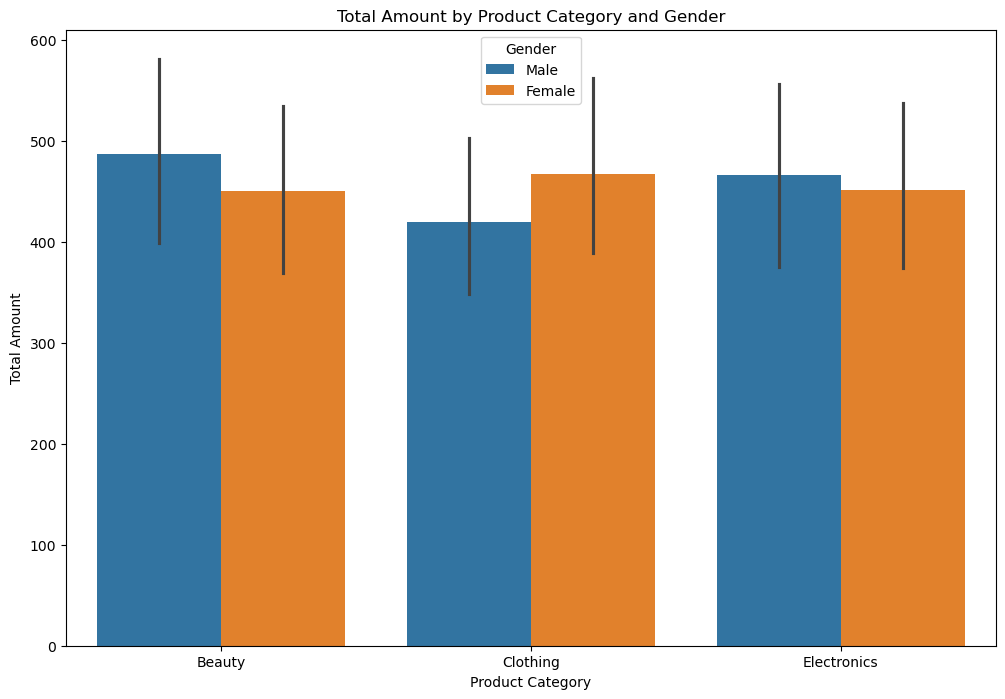

In [8]:
# Visualize distributions
plt.figure(figsize=(12,8))
sns.barplot(x='Product Category', y='Total Amount', data=df, hue='Gender')
plt.title('Total Amount by Product Category and Gender')
plt.show()

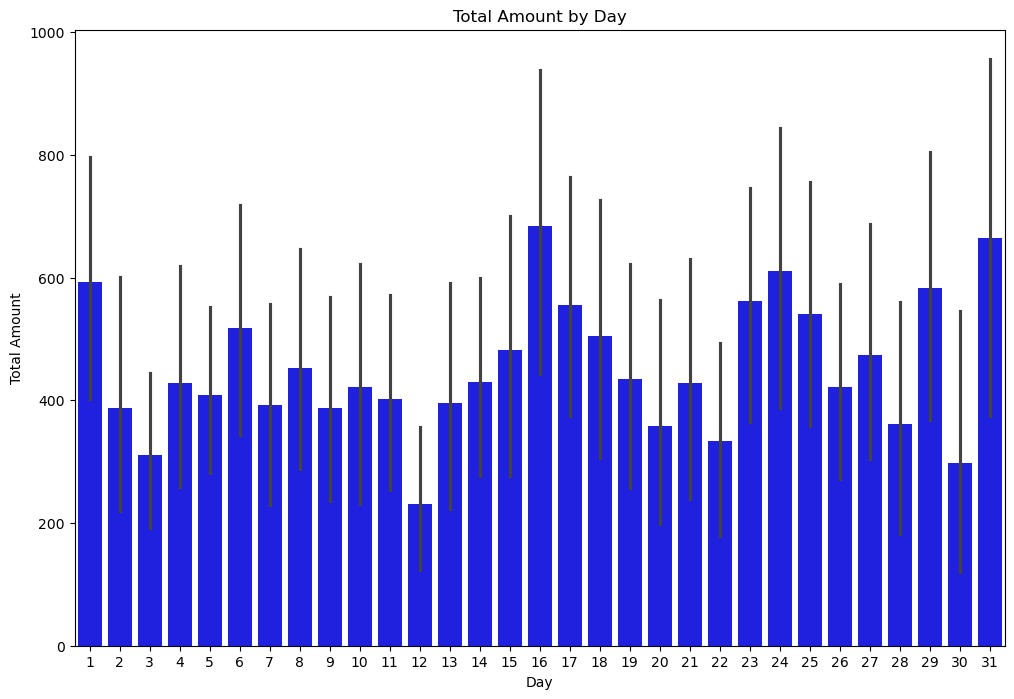

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(x='Day', y='Total Amount', data=df, color='b')
plt.title('Total Amount by Day')
plt.show()

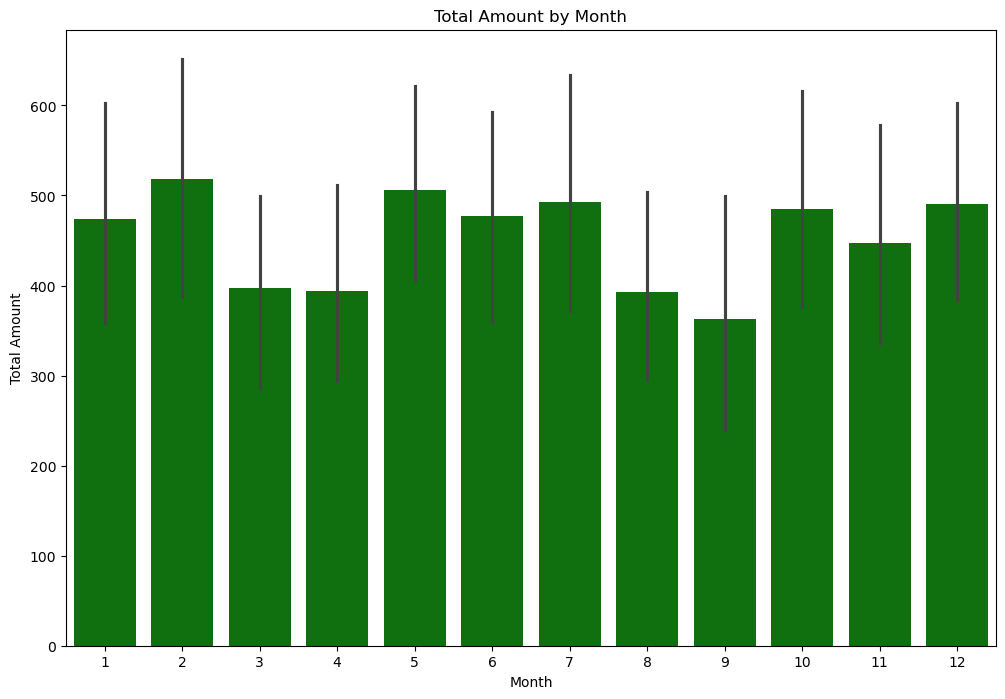

In [10]:
plt.figure(figsize=(12,8))
sns.barplot(x='Month', y='Total Amount', data=df, color='g')
plt.title('Total Amount by Month')
plt.show()

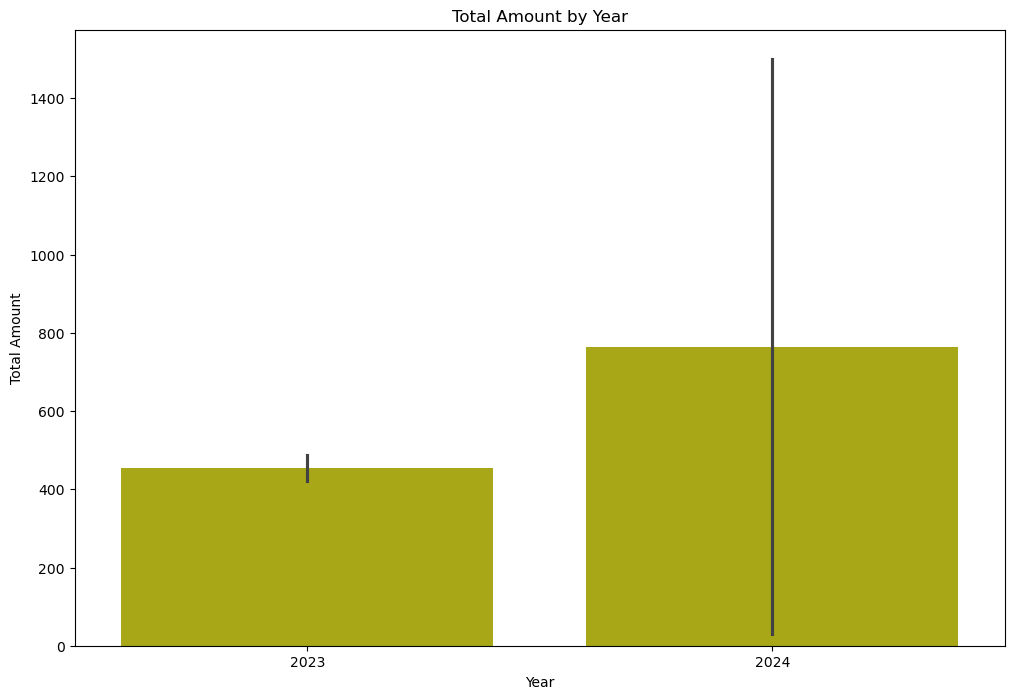

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x='Year', y='Total Amount', data=df, color='y')
plt.title('Total Amount by Year')
plt.show()

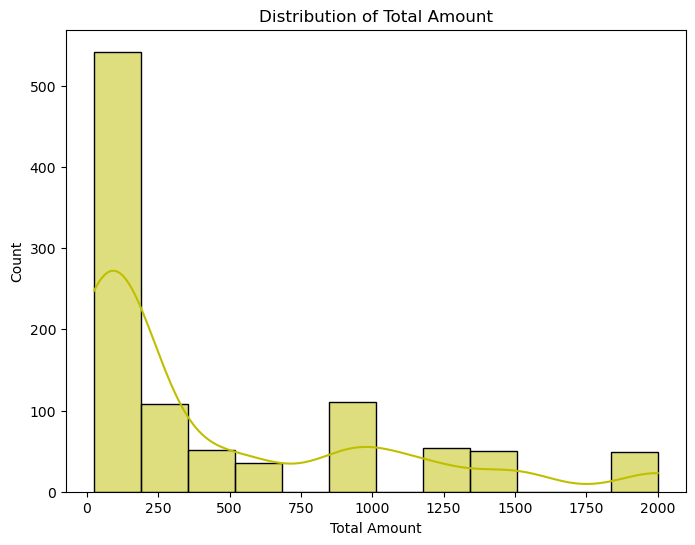

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(df['Total Amount'], kde=True, color='y')
plt.title('Distribution of Total Amount')
plt.show()

# Modeling  

In [13]:
# Label Encoding categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Product Category'] = le.fit_transform(df['Product Category'])

In [14]:
# Defining features and target variable
X = df.drop('Total Amount', axis=1)
y = df['Total Amount']

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Define parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],      
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],  
    'max_depth': [3, 5, 7, 9],                     
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],        
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0], 
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],              
    'min_child_weight': [1, 2, 3, 4],               
}

In [17]:
# Initialize RandomizedSearchCV with XGBRegressor
xgb = XGBRegressor()
random_search = RandomizedSearchCV(estimator=xgb, 
                                   param_distributions=param_grid, 
                                   n_iter=100, 
                                   scoring='neg_mean_squared_error', 
                                   cv=5, 
                                   verbose=1, 
                                   n_jobs=-1, 
                                   random_state=42)

# Fit the model with RandomizedSearchCV
random_search.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 7, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 1.0}


In [18]:
# Train the XGBoost model with the best parameters
xgb = XGBRegressor(subsample=1.0, n_estimators=200, min_child_weight=2, 
                   max_depth=7, learning_rate=0.15, gamma=0, 
                   colsample_bytree=1.0)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
# Predict and evaluate the model on both training and testing sets
train_predictions = xgb.predict(X_train)
test_predictions = xgb.predict(X_test)

In [20]:
print("Training Set Performance")
print('MSE:', mean_squared_error(y_train, train_predictions))
print('R²:', r2_score(y_train, train_predictions))

print("\nTest Set Performance")
print('MSE:', mean_squared_error(y_test, test_predictions))
print('R²:', r2_score(y_test, test_predictions))

Training Set Performance
MSE: 2.9293145676742174e-08
R²: 0.9999999999999106

Test Set Performance
MSE: 2.962629271981617e-08
R²: 0.999999999999894


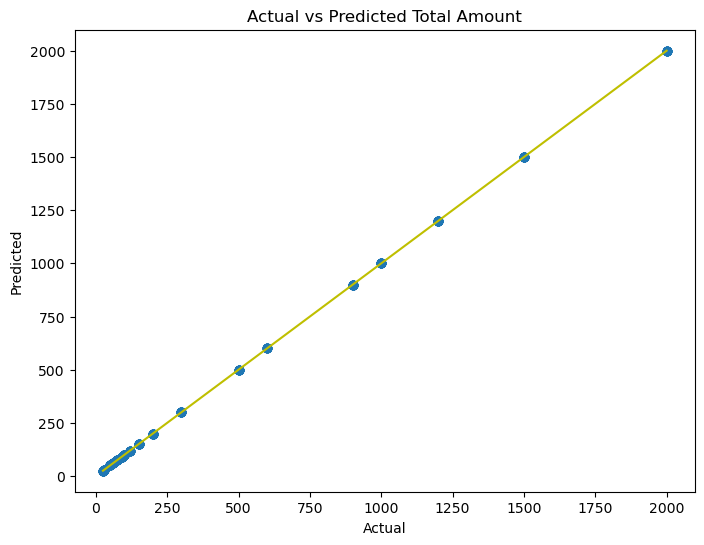

In [21]:
# Plotting the predicted vs actual values for the test set
plt.figure(figsize=(8,6))
plt.scatter(y_test, test_predictions)
plt.plot([min(y_test),max(test_predictions)],[min(y_test),max(test_predictions)],color='y')
plt.title('Actual vs Predicted Total Amount')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()